In [50]:
from Bio.PDB import *

from tst.domutil.pdbutil import *
from tst.domutil.util import *
import sys,os


In [1]:
from tst.domutil.pdbutil import *
from tst.domutil.util import *
import sys,os


In [10]:
os.environ['PDBlib'] = os.path.expandvars('$repos/cathdb/temppdbs')
# os.environ['PDBlib']

In [11]:
# modct
with stdoutIO() as s:
    d = get_something("1r5lA01")
print d


In [30]:
dom = '5cdzA01'
p = PDBParser()
structure = p.get_structure('X', 
                            os.path.expandvars('$PDBlib/1r5lA01'))
structure = p.get_structure('X', 
                            os.path.expandvars('$PDBlib/'+dom))
with stdoutIO() as s:
    d = get_something_modeller(dom)
print d

# struct = 
alst = list(structure.get_atoms())
nalst = NeighborSearch(alst ).search_all(radius = 6.0)
# alst[0].__dict__
len(nalst)


117763

In [34]:
import numpy as np
xs = np.linspace(0.001,4,50)
ys = [];
for rad in xs:
    nalst = NeighborSearch(alst ).search_all(radius = rad)
    # alst[0].__dict__
    count = len(nalst)
    ys += [count]
ys = np.array(ys)

bdcount = len(
    NeighborSearch(alst ).search_all(radius = 2.0)
    )

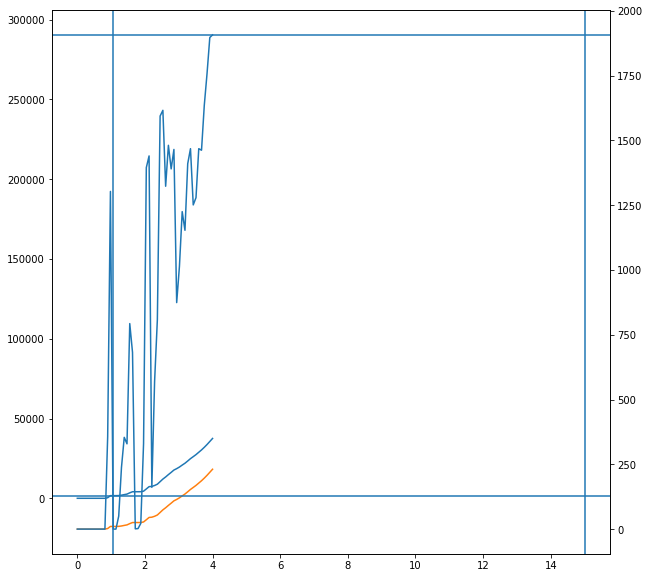

In [49]:
bdcount = len(
    NeighborSearch(alst ).search_all(radius =3.0)
    )

guess = len(
    NeighborSearch(alst ).search_all(radius =15.0)
    )

import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=[10,10])
ax1=plt.subplot(111)
ax1b=ax1.twinx()
ax1.plot(xs,ys)
ax1.plot(xs,ys-bdcount)
ax1.axhline(d['nbpair_count'])
ax1.axvline(15.0)
idx =np.where(xs>1.0)[0][0]
ax1.axvline(xs[idx])
ax1.axhline(ys[idx])

# ax1.axhline(xs[idx])

ax1b.plot(xs,
         np.convolve(ys,[1,-1],'same')
        )

pdbname = '1r5lA01'
print "\n// structure is %s" % pdbname
print("Expected: %d"%(d['nbpair_count']))
print("Actually: %d"% ( guess - bdcount ))

In [51]:
# xs.flat[np.where(xs>1.0)]
idx =np.where(xs>1.0)[0][0]
ys[idx+1]

1660

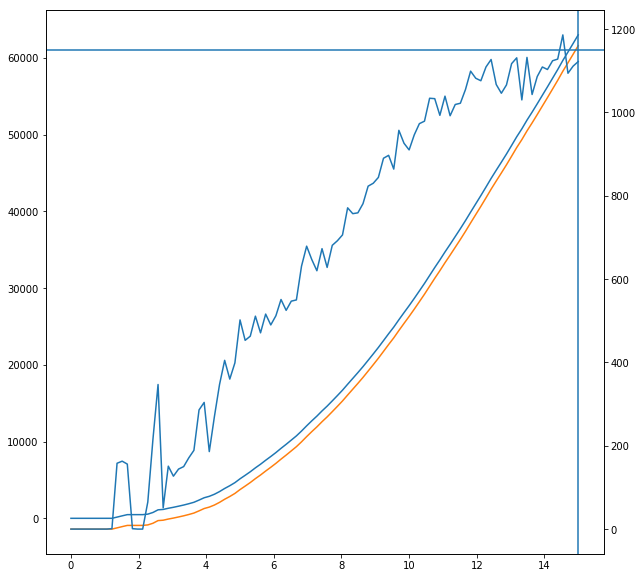

In [18]:
bdcount = len(
    NeighborSearch(alst ).search_all(radius =3.0)
    )

guess = len(
    NeighborSearch(alst ).search_all(radius =15.0)
    )

import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=[10,10])
ax1=plt.subplot(111)
ax1b=ax1.twinx()
ax1.plot(xs,ys)
ax1.plot(xs,ys-bdcount)
ax1.axhline(d['nbpair_count'])
ax1.axvline(15.0)


ax1b.plot(xs,
         np.convolve(ys,[1,-1],'same')
        )

pdbname = '1r5lA01'
print "\n// structure is %s" % pdbname
print("Expected: %d"%(d['nbpair_count']))
print("Actually: %d"% ( guess - bdcount ))

In [4]:
dlst = domain.objects.values_list('domain_id', flat = True)


In [ ]:
# def count_nbpair(alst):


In [31]:
### Best guess: cut1 = 3.5 cut2 = 15.0 

# pdbname = '1r5lA01'
import sys
p = PDBParser()

cost = 0
def eval_cost(cut1=3.0,cut2=15.0,debug=0,lst = dlst[:5] ):
    cost = 0
    for pdbname in lst:
        pdbfile = os.path.expandvars('$PDBlib/' + pdbname)

    #     statinfo = os.stat(pdbfile)
        size = os.path.getsize(pdbfile)

        with stdoutIO() as s:
            f = open(pdbfile,'r')        
            try:
                d = get_something(f)
                nbcount_mod = d['nbpair_count']
            except Exception as e:
                nbcount_mod = 0
                print >> sys.__stdout__, e
            finally:
                f.close()


        structure = p.get_structure('X', 
                                pdbfile);
        alst = list(structure.get_atoms());

        bdcount = len(
            NeighborSearch(alst ).search_all(radius =cut1)
            )
        nbcount_guess = len(
            NeighborSearch(alst ).search_all(radius =cut2)
            ) - bdcount

        cost += abs(nbcount_guess-nbcount_mod)/float(nbcount_guess+nbcount_mod)
        if debug:
            print >> sys.__stdout__, "\n// structure is %s" % pdbname
            print "filesize %d" % size
            print >>sys.__stdout__,"pdbname is : %s"%pdbname

            print >> sys.__stdout__, "Expected: %d"%( nbcount_mod )
            print >> sys.__stdout__,"Actually: %d"% (nbcount_guess)
            print >> sys.__stdout__,"Difcount: %d"% (nbcount_guess-nbcount_mod)
            
    return cost
    


In [33]:
# s.__dict__


xs = np.linspace(3.3,3.4,5)
# xs = np.linspace(3.25,3.75,5)
ys = np.linspace(15.0,15.0,1)
gd = np.meshgrid(xs,ys)
xss,yss = gd 

zss = [];
c = 0
for x,y in zip(xss.flat,yss.flat):
    zss.append(eval_cost(x,y,debug = 0,lst = dlst[:10]))
    c+=1
    print >>sys.__stdout__, c

/home/shouldsee/.local/lib/python2.7/site-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Used element 'H' for Atom (name=H) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/shouldsee/.local/lib/python2.7/site-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Used element 'H' for Atom (name=HE21) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/shouldsee/.local/lib/python2.7/site-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Used element 'H' for Atom (name=HE22) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/shouldsee/.local/lib/python2.7/site-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Used element 'H' for Atom (name=HH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/shouldsee/.local/lib/python2.7/site-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Used element 'H' for Atom (name=HG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/

In [29]:
from modeller import *
from modeller.scripts import complete_pdb
def get_something_modeller( pdbfile, env = None, auto_complete = False, s0 = None, **kwargs):
    if not env:
        env = environ()
        #env.io.atom_files_directory = ['../atom_files']
        env.io.atom_files_directory = ['../pdbs',
        '$(PDBlib)']
        env.libs.topology.read(file='$(LIB)/top_heav.lib')
        env.libs.parameters.read(file='$(LIB)/par.lib')
    if auto_complete:
        mdl = complete_pdb(env, pdbfile)
    else:
        mdl = model(env)
        mdl.read( pdbfile, model_format='PDB', model_segment=('FIRST:@', 'LAST:'), io=None);

    if not s0:
        s0 = StringIO.StringIO();
    else:
        s0.truncate(0)

    with stdoutIO(s0) as s:
        nDOPE = mdl.assess_normalized_dope()
    s0buf = ''.join(s0.buflist)
    # return 
    outdict = {"nDOPE":nDOPE,
        "DOPE": float(p_energy.findall(s0buf)[0]),
        "nbpair_count":int(p_nb.findall(s0buf)[0]),
        "atom_count":int(p_atomCount.findall(s0buf)[0].strip()),
         "res_count":  int(p_resCount.findall(s0buf)[0]),
          }
    return outdict

In [75]:
# 
# len(gd[1
pzss = zss + [250000] * (100-len(zss))
pzss = np.log(np.reshape(pzss, xss.shape))

['filesize 54739',
 '\n',
 'cut1 3.350000',
 '\n',
 'cut2 15.000000',
 '\n',
 'cut1 3.400000',
 '\n',
 'cut2 15.000000',
 '\n']

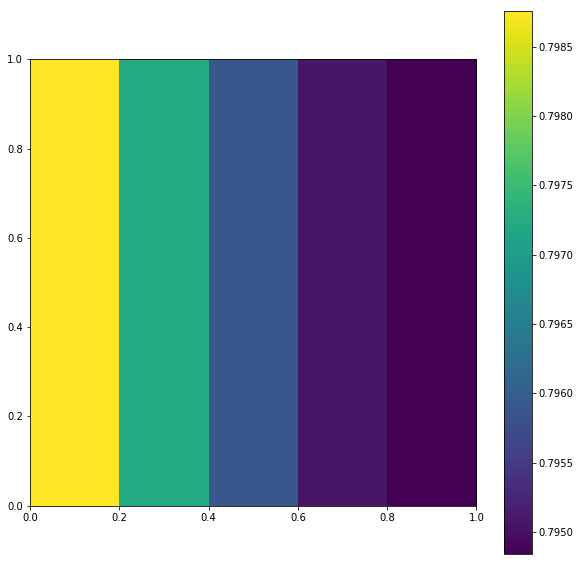

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=[10,10])
ax1=plt.subplot(111)

pzss = zss
pzss = (np.reshape(pzss, xss.shape))
im = ax1.imshow(pzss, extent=[0, 1, 0, 1])
plt.colorbar(im)

print "cut1 %f" % xss.flat[np.argmin(pzss)]
print "cut2 %f" % yss.flat[np.argmin(pzss)]
sys.stdout.buflist[-10:]
# s.__dict__
# zip(xss,yss,pzss)
# zss

In [2]:
import sys
for p in sys.path:
    print p


/home/shouldsee/Documents/repos/modeller9.18/lib/x86_64-intel8/python2.5
/home/shouldsee/Documents/repos/modeller9.18/lib/x86_64-intel8
/home/shouldsee/Documents/repos/modeller9.18/modlib
/usr/lib/python2.7
/usr/lib/python2.7/plat-x86_64-linux-gnu
/usr/lib/python2.7/lib-tk
/usr/lib/python2.7/lib-old
/usr/lib/python2.7/lib-dynload
/home/shouldsee/.local/lib/python2.7/site-packages
/home/shouldsee/.local/lib/python2.7/site-packages/pygpu-0.6.6-py2.7-linux-x86_64.egg
/usr/local/lib/python2.7/dist-packages
/usr/local/lib/python2.7/dist-packages/pygpu-0.6.6-py2.7-linux-x86_64.egg
/usr/lib/python2.7/dist-packages
/usr/lib/python2.7/dist-packages/gtk-2.0
/usr/lib/python2.7/dist-packages/ubuntu-sso-client
/home/shouldsee/.local/lib/python2.7/site-packages/IPython/extensions
/home/shouldsee/.ipython
